## 1. Описание задачи

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса "МиФаСоль". Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- правильно классифицировать новые музыкальные треки, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача -- разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

### Описание данных

- **instance_id** -Уникальный идентификатор трека
- **track_name** - Название трека
- **acousticness** - Мера уверенности от 0,0 до 1,0 в том, что трек является акустическим. 1,0 означает высокую степень уверенности в том, что трек является акустическим.
- **danceability** - Танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу ударов и общую регулярность. Значение 0,0 означает наименьшую танцевальность, а 1,0 - наибольшую танцевальность.
- **duration_ms** - Продолжительность трека в миллисекундах.
- **energy** - Энергия это показатель от 0,0 до 1,0, представляющий собой меру интенсивности и активности. Как правило, энергичные композиции ощущаются как быстрые, громкие и шумные. Например, дэт-метал обладает высокой энергией, в то время как прелюдия Баха имеет низкую оценку этого параметра
- **instrumentalness** - Определяет, содержит ли трек вокал. Звуки "Ooh" и "aah" в данном контексте рассматриваются как инструментальные. Рэп или разговорные треки явно являются "вокальными". Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокала
- **key** - базовый ключ (нота) произведения
- **liveness** - Определяет присутствие аудитории в записи. Более высокие значения liveness означают увеличение вероятности того, что трек был исполнен вживую. Значение выше 0,8 обеспечивает высокую вероятность того, что трек исполняется вживую
- **loudness** - Общая громкость трека в децибелах (дБ)
- **mode** - Указывает на модальность (мажорную или минорную) трека
- **speechiness** - Речевой характер определяет наличие в треке разговорной речи. Чем более исключительно речевой характер носит запись (например, ток-шоу, аудиокнига, поэзия), тем ближе значение атрибута к 1,0. Значения выше 0,66 характеризуют треки, которые, вероятно, полностью состоят из разговорной речи. Значения от 0,33 до 0,66 характеризуют треки, которые могут содержать как музыку, так и речь, как в виде фрагментов, так и в виде слоев, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие неречевые треки.
- **tempo** - Темп трека в ударах в минуту (BPM). В музыкальной терминологии темп представляет собой скорость или темп данного произведения и напрямую зависит от средней продолжительности тактов
- **obtained_date** - дата загрузки в сервис
- **valence** - Показатель от 0,0 до 1,0, характеризующий музыкальный позитив, передаваемый треком. Композиции с высокой валентностью звучат более позитивно (например, радостно, весело, эйфорично), а композиции с низкой валентностью - более негативно (например, грустно, депрессивно, сердито)
- **music_genre** - Музыкальный жанр трека

## 2. Загрузка данных и их Предобработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.utils import shuffle
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

import sklearn
import numpy as np

In [2]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [3]:
train_df = pd.read_csv("kaggle_music_genre_train.csv")
test_df = pd.read_csv("kaggle_music_genre_test.csv")
sample_df = pd.read_csv("sample_submit.csv")

In [4]:
print("---------------------- Head -----------------------")
print("       Тренировочный:")
display(train_df.head())
print("       Тестовый:")
display(test_df.head())

print("---------------------- Info -----------------------")
print("       Тренировочный:")
display(train_df.info())
print("       Тестовый:")
display(test_df.info())

print("---------------------- Describe -----------------------")
print("       Тренировочный:")
display(train_df.describe())
print("       Тестовый:")
display(test_df.describe())

---------------------- Head -----------------------
       Тренировочный:


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,25143.0,Highwayman,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,-16.842,Major,0.0463,101.384,4-Apr,0.450,Country
1,26091.0,Toes Across The Floor,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,-8.392,Minor,0.0352,113.071,4-Apr,0.539,Rock
2,87888.0,First Person on Earth,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,-5.225,Minor,0.3710,80.980,4-Apr,0.344,Alternative
3,77021.0,No Te Veo - Digital Single,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,-4.805,Minor,0.0804,116.007,4-Apr,0.966,Hip-Hop
4,20852.0,Chasing Shadows,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,-5.550,Major,0.0487,76.494,4-Apr,0.583,Alternative


       Тестовый:


,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
0,48564,Low Class Conspiracy,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,-7.136,Minor,0.3560,90.361,4-Apr,0.895
1,72394,The Hunter,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,-5.175,Major,0.0294,78.385,4-Apr,0.318
2,88081,Hate Me Now,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,-4.399,Minor,0.2220,90.000,4-Apr,0.412
3,78331,Somebody Ain't You,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,-4.604,Major,0.0483,160.046,4-Apr,0.614
4,72636,Sour Mango,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,-8.833,Major,0.2020,73.830,4-Apr,0.121


---------------------- Info -----------------------
       Тренировочный:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre  

None

       Тестовый:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


None

---------------------- Describe -----------------------
       Тренировочный:


,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,20394.000000,20394.000000,20394.000000,2.039400e+04,20394.000000,20394.000000,20394.000000,20394.000000,20394.000000,19952.000000,20394.000000
mean,55973.846916,0.274783,0.561983,2.203754e+05,0.625276,0.159989,0.198540,-8.552998,0.091352,120.942522,0.464588
std,20695.792545,0.321643,0.171898,1.267283e+05,0.251238,0.306503,0.166742,5.499917,0.097735,30.427590,0.243387
min,20011.000000,0.000000,0.060000,-1.000000e+00,0.001010,0.000000,0.013600,-44.406000,0.022300,34.765000,0.000000
25%,38157.250000,0.015200,0.451000,1.775170e+05,0.470000,0.000000,0.097300,-10.255750,0.035600,95.921750,0.272000
50%,56030.000000,0.120000,0.570000,2.195330e+05,0.666000,0.000144,0.130000,-7.052000,0.049050,120.012500,0.457000
75%,73912.750000,0.470000,0.683000,2.660000e+05,0.830000,0.084475,0.253000,-5.054000,0.095575,141.966250,0.653000
max,91758.000000,0.996000,0.978000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.041000,0.992000


       Тестовый:


,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,5099.000000,5099.000000,5099.000000,5.099000e+03,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,4978.000000,5099.000000
mean,55643.871347,0.276324,0.561888,2.173974e+05,0.622030,0.165198,0.197924,-8.630186,0.092718,121.246463,0.465593
std,20762.384803,0.322657,0.170502,1.156374e+05,0.251829,0.311940,0.166241,5.619766,0.100130,29.875950,0.244217
min,20012.000000,0.000002,0.059600,-1.000000e+00,0.001540,0.000000,0.020400,-46.122000,0.022600,37.114000,0.020500
25%,37571.000000,0.016600,0.451000,1.737335e+05,0.465000,0.000000,0.096950,-10.231000,0.035700,96.070250,0.272000
50%,55246.000000,0.120000,0.568000,2.175000e+05,0.660000,0.000157,0.129000,-7.135000,0.048700,120.053500,0.458000
75%,73702.000000,0.460000,0.681000,2.642470e+05,0.826000,0.092750,0.248000,-5.127000,0.096550,141.934250,0.650000
max,91709.000000,0.996000,0.977000,1.360027e+06,0.999000,0.994000,0.990000,1.949000,0.918000,216.029000,0.982000


 - Есть малый процент пропусков, их можно удалить
 - Категориалные значения стоит проверить на уникальность
 - В целом данные в порядке
 - Столбцы с id, названиями треков и датой обновления не нужны для модели, их уберем

In [5]:
numeric = ['acousticness', 'danceability', 'duration_ms', 'energy',
           'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
categories = ['key', 'mode']

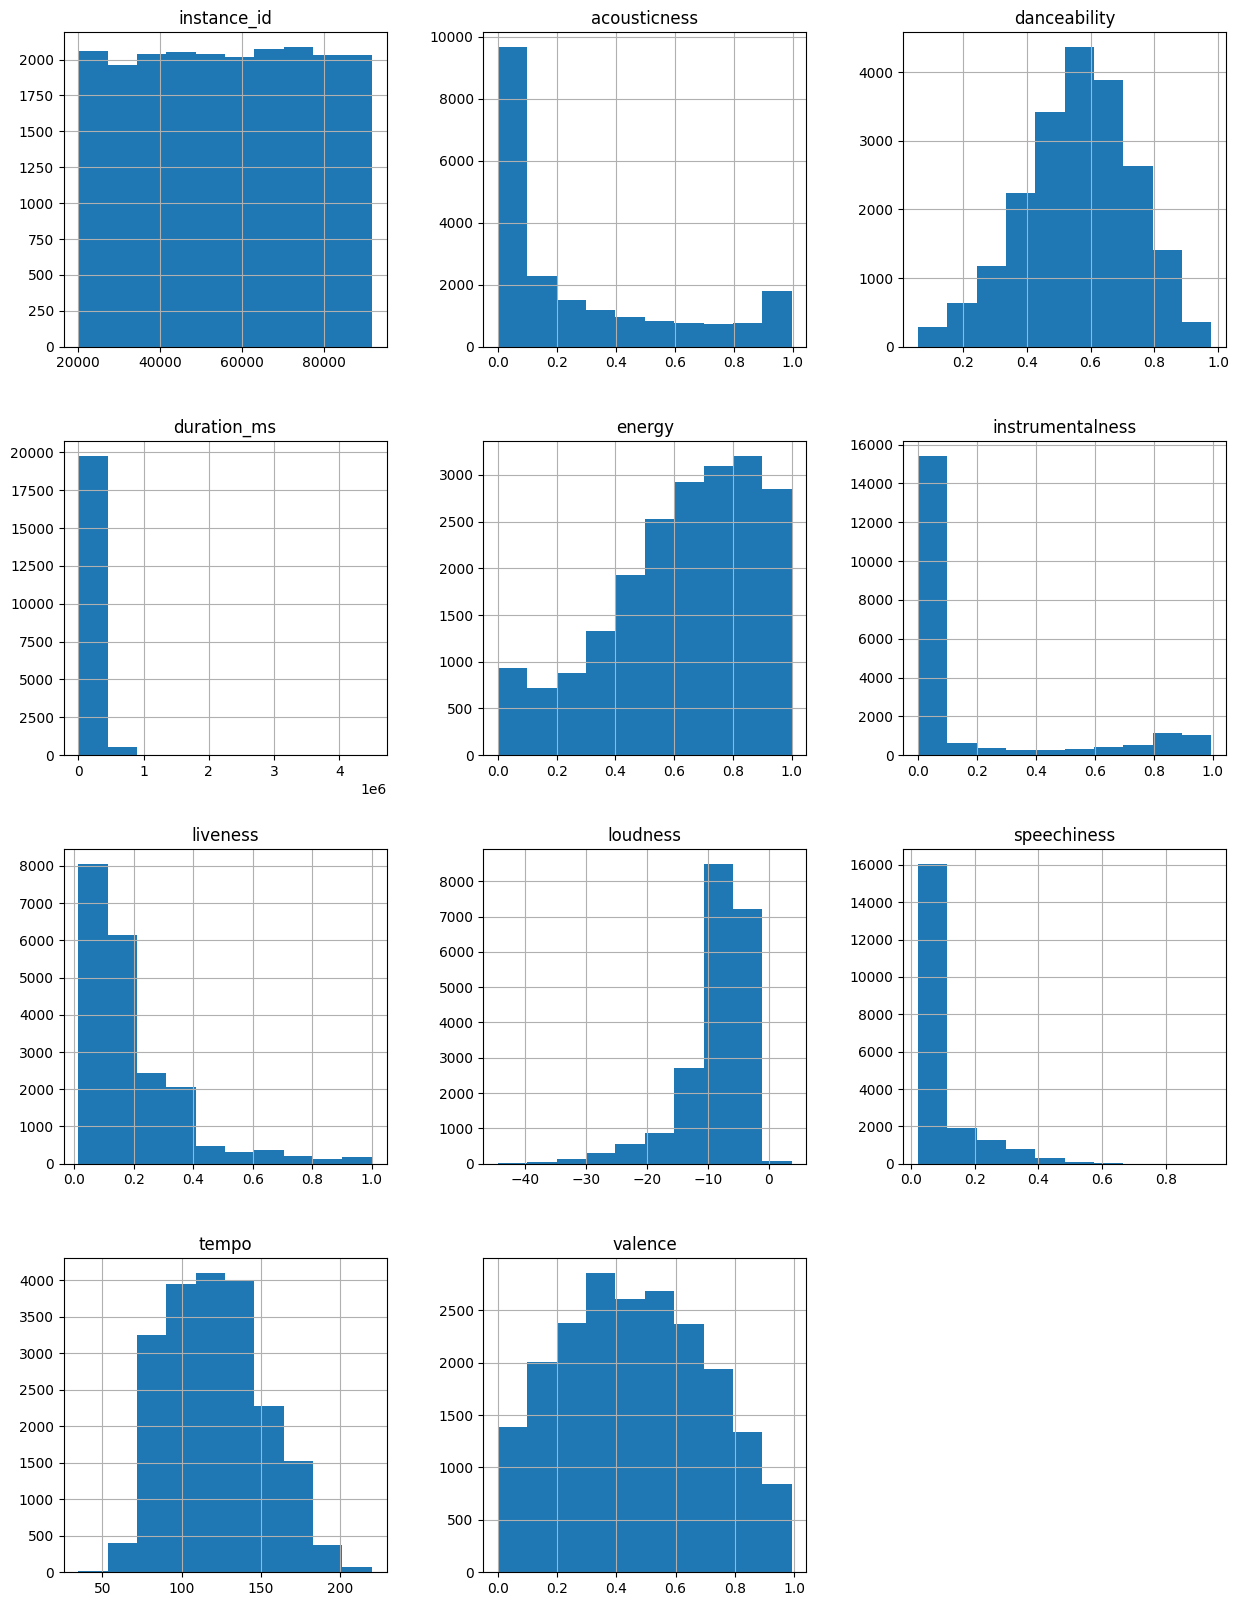

In [6]:
train_df.hist(figsize=(15,20));

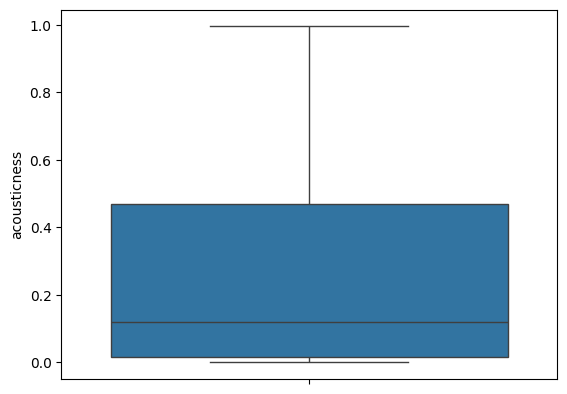

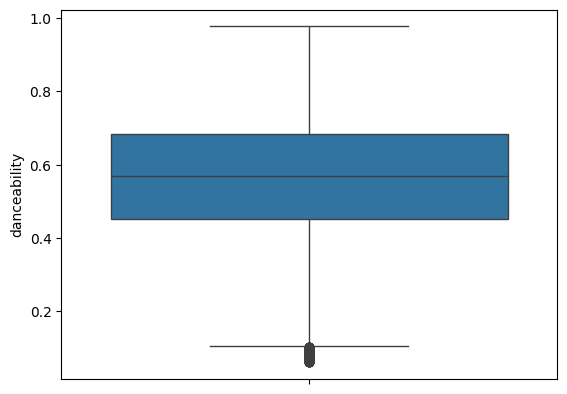

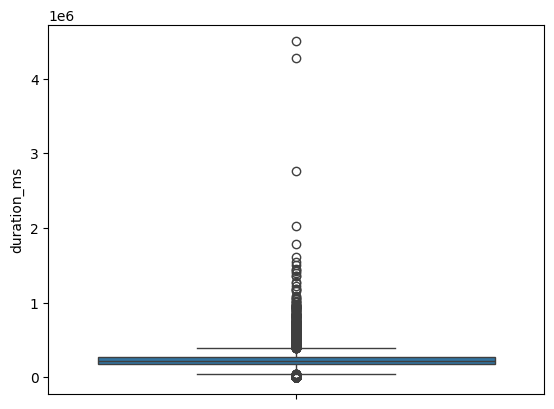

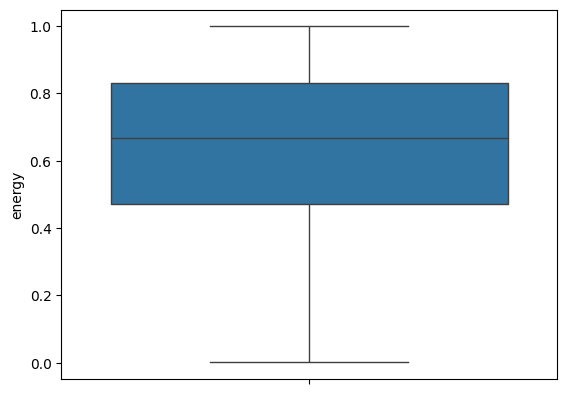

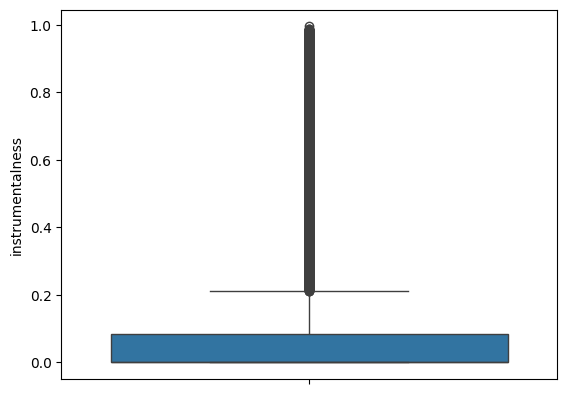

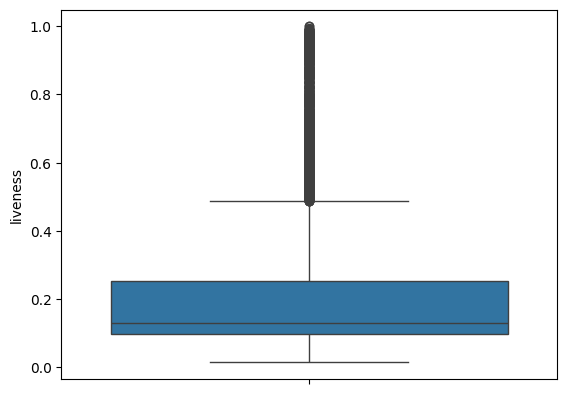

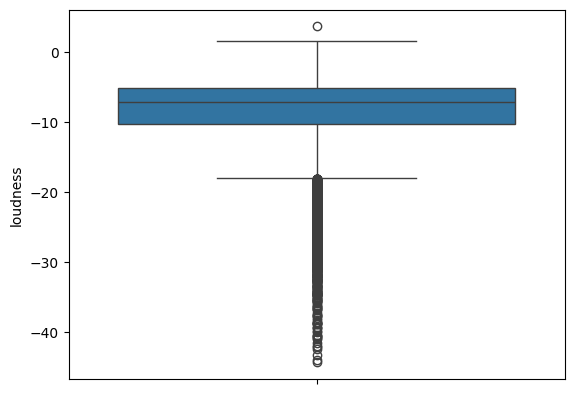

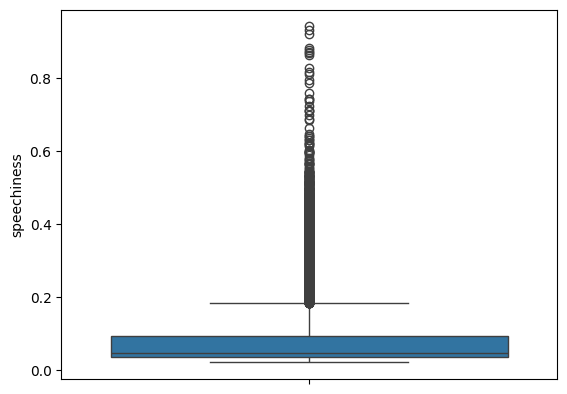

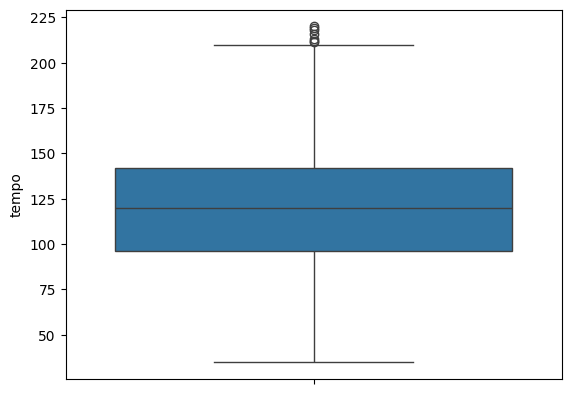

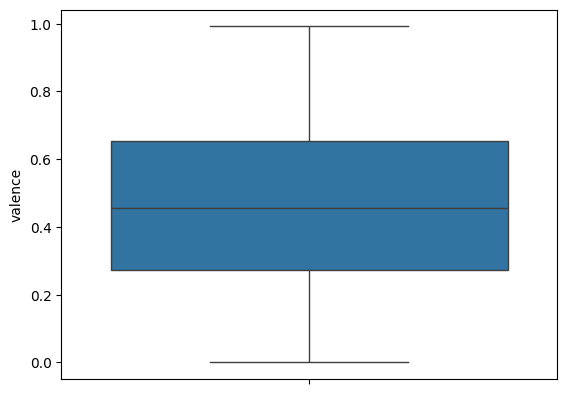

In [7]:
for i in numeric:
    fig, ax = plt.subplots(1)
    sns.boxplot(train_df[i])
    plt.show();

- Видим, что большинство данных распределены нормально, но есть некоторые аномалии:
    - Например, столбец `loudness` имеет отрицаельные значения, что попросту невозможно (заменим на абсолютное число)
    - Как и в стобце `duration_ms`, песня не может длится отрицательное число милисекунд(их удаляем)

In [8]:
train_df.drop(train_df[train_df['duration_ms'] < 0].index, inplace=True )
test_df.drop(train_df[train_df['duration_ms'] < 0].index, inplace=True )

In [9]:
train_df['loudness'] = abs(train_df['loudness'])
test_df['loudness'] = abs(train_df['loudness'])

In [10]:
# fig, ax = plt.subplots(1)
# sns.boxplot(train_df['loudness'])
# plt.show();

- Далее удаляем пропуски и ненужные столбцы

In [11]:
train_df = train_df.dropna(subset=['key', 'mode', 'tempo'])
test_df = test_df.dropna(subset=['key', 'mode', 'tempo'])

train_df.drop(['instance_id', 'track_name', 'obtained_date'], axis=1, inplace=True )
test_df.drop(['instance_id', 'track_name', 'obtained_date'], axis=1, inplace=True )

In [12]:
display(train_df.head())
display(test_df.head())

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0.4800,0.670,182653.0,0.351,0.017600,D,0.115,16.842,Major,0.0463,101.384,0.450,Country
1,0.2430,0.452,187133.0,0.670,0.000051,A,0.108,8.392,Minor,0.0352,113.071,0.539,Rock
2,0.2280,0.454,173448.0,0.804,0.000000,E,0.181,5.225,Minor,0.3710,80.980,0.344,Alternative
3,0.0558,0.847,255987.0,0.873,0.000003,G#,0.325,4.805,Minor,0.0804,116.007,0.966,Hip-Hop
4,0.2270,0.742,195333.0,0.575,0.000002,C,0.176,5.550,Major,0.0487,76.494,0.583,Alternative


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,0.301000,0.757,146213.0,0.679,0.00000,A#,0.3030,16.842,Minor,0.3560,90.361,0.895
1,0.538000,0.256,240360.0,0.523,0.00832,G#,0.0849,8.392,Major,0.0294,78.385,0.318
2,0.005830,0.678,284000.0,0.770,0.00000,A,0.1090,5.225,Minor,0.2220,90.000,0.412
3,0.020300,0.592,177354.0,0.749,0.00000,B,0.1220,4.805,Major,0.0483,160.046,0.614
4,0.000335,0.421,-1.0,0.447,0.01480,D,0.0374,5.550,Major,0.2020,73.830,0.121


- Проверим категориальные данные на уникальность и заодно посмотрим на балланс целевого признака

In [13]:
print('Тренировочная:\n')
print(train_df['key'].unique())

print(train_df['mode'].unique())

print(train_df['music_genre'].value_counts(), '\n')

print('Тестовая:\n')

display(test_df['key'].unique())

print(test_df['mode'].unique())


Тренировочная:

['D' 'A' 'E' 'G#' 'C' 'D#' 'A#' 'F' 'G' 'C#' 'F#' 'B']
['Major' 'Minor']
Blues          2393
Alternative    2149
Electronic     2134
Rap            1980
Rock           1779
Country        1745
Anime          1589
Classical      1144
Jazz           1052
Hip-Hop         949
Name: music_genre, dtype: int64 

Тестовая:



array(['A#', 'G#', 'A', 'B', 'D', 'F#', 'F', 'G', 'C', 'D#', 'C#', 'E'],
      dtype=object)

['Minor' 'Major']


**2. Вывод:** Предобработка закончена, что мы имеем:
 - Большая часть данных распределены нормально
 - удалили ненужные стобцы и пропуски
 - Скорректировали некоторые признаки.
 
 Далее перейдем к подговке признаков

## 3. Подготовка признаков.

- Сначала разделяем тренировочную выборку

In [14]:
target = train_df['music_genre'] #Целевой признак
features = train_df.drop(['music_genre'], axis=1) #Остальные признаки
print(features.shape, target.shape)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, train_size=0.7, 
                                                  random_state=12345, stratify=target)

(16914, 12) (16914,)


- Закодируем категориальные признаки с помощью OHE. Для этого напишем функции:

In [15]:
def get_ohe_fit(df_in):
    df = df_in
    temp_df = pd.DataFrame(data=ohe.fit_transform(df[categories]).toarray(), columns=ohe.get_feature_names_out())
    df.drop(columns=categories, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [16]:
def get_ohe(df_in):
    df = df_in
    temp_df = pd.DataFrame(data=ohe.transform(df[categories]).toarray(), columns=ohe.get_feature_names_out())
    df.drop(columns=categories, axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

In [17]:
ohe = OneHotEncoder(drop='first', max_categories=20, handle_unknown='infrequent_if_exist')

features_train = get_ohe_fit(features_train)
features_valid = get_ohe(features_valid)
target_train.reset_index(drop=True, inplace=True)
target_valid.reset_index(drop=True, inplace=True)

In [18]:
display(features_train.head())
display(features_valid.head())

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,0.7810,0.698,303693.0,0.488,0.00291,0.1370,7.930,0.0471,68.593,0.3950,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0998,0.641,287240.0,0.500,0.00000,0.0255,5.770,0.0921,79.927,0.7980,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1460,0.453,293400.0,0.570,0.00292,0.0962,7.080,0.0489,122.670,0.0773,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0150,0.529,199008.0,0.943,0.00000,0.1630,4.299,0.0770,95.152,0.6000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0493,0.416,226286.0,0.823,0.01410,0.0592,6.464,0.0650,104.807,0.0449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
0,0.044400,0.838,190435.0,0.698,0.0785,0.0278,2.215,0.2050,92.029,0.774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.013100,0.545,197680.0,0.616,0.0000,0.0523,6.092,0.0453,159.987,0.602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.000601,0.401,208000.0,0.985,0.0652,0.0887,3.870,0.3340,149.952,0.120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.021600,0.510,243773.0,0.503,0.0020,0.1080,8.756,0.2420,153.582,0.193,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.129000,0.621,311507.0,0.809,0.0000,0.2730,10.065,0.0452,118.044,0.768,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


- Еще бы я добавил стандартизацию, так как некторые признаки имеют намного большее численное значение относительно других(duration_ms)

In [19]:
# scaler = StandardScaler()
# features_train[numeric] = scaler.fit_transform(features_train[numeric])
# #features_train.head()
# features_valid[numeric] = scaler.fit_transform(features_valid[numeric])

**3. Вывод:** Данные готовы к обучению и проверки моделей

## 4. Обучение и выбор модели

- Буду использовать лес и Логистическую регрессию.

In [48]:
model = LogisticRegression(solver='newton-cholesky', random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

print("Значение F1:", f1_score(target_valid, predicted_valid, average='micro'))

Значение F1: 0.3733990147783251


- Перебрал разные solvers и лучшим оказался newtin-cholesky, но все равно результат не оченью

In [51]:
best_depth = 0
f1 = 0
for depth in range(1, 16):
    model = RandomForestClassifier(max_depth=depth, n_estimators=80, random_state=12345, class_weight='balanced')
    model.fit(features_train, target_train)
    
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    if f1_score(target_valid, predicted_valid, average='micro') > f1:
        best_depth = depth
        f1 = f1_score(target_valid, predicted_valid, average='micro')

print("Лучшая глубина поиска:", best_depth)
print("Значение F1:", f1)

Лучшая глубина поиска: 15
Значение F1: 0.4612807881773399


- Здесь выбрали оптимальную глубину, уже результат лучше, чем у Logistic Regression

In [52]:
f1 = 0

model = RandomForestClassifier(max_depth=best_depth, n_estimators=300, random_state=12345, class_weight='balanced')
model.fit(features_train, target_train)
    
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
f1 = f1_score(target_valid, predicted_valid, average='micro')


print("Значение F1:", f1)

Значение F1: 0.4640394088669951


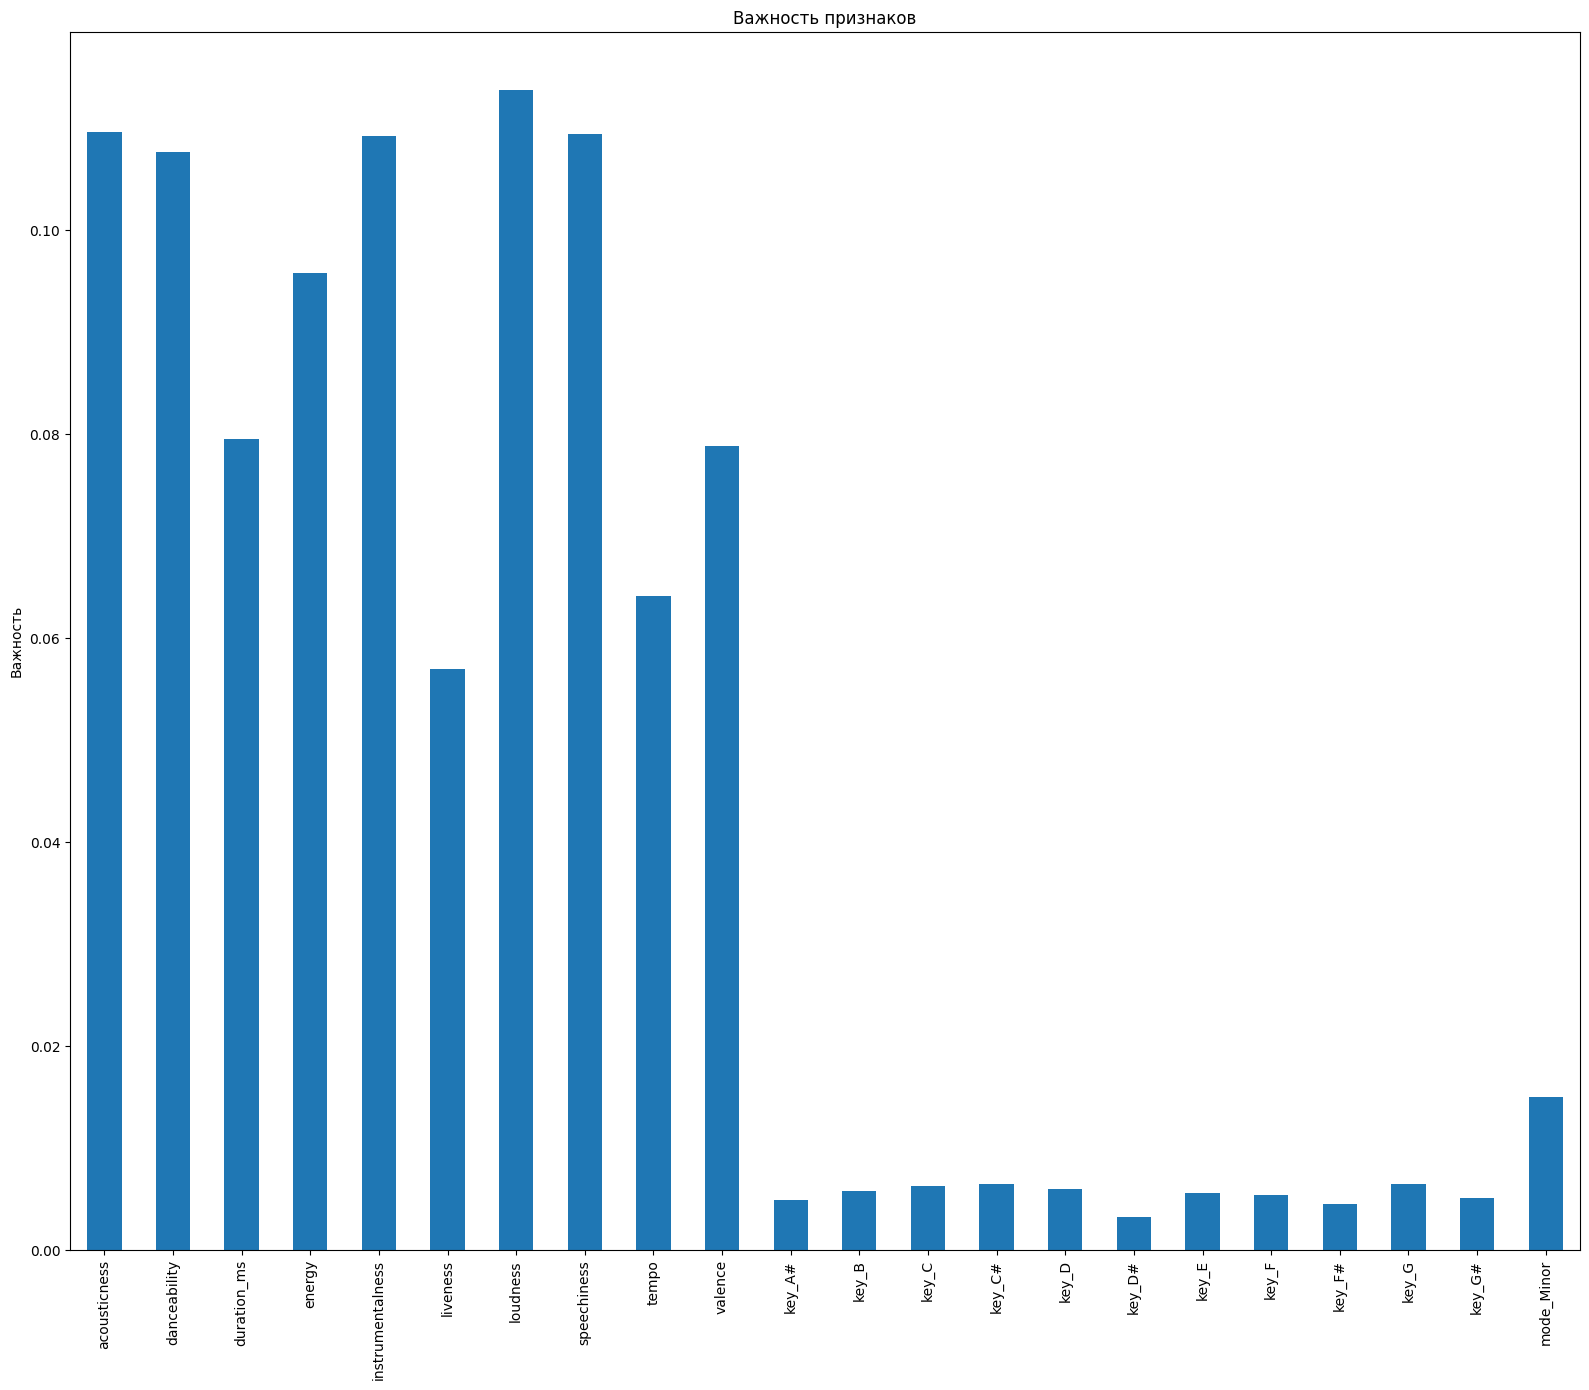

In [54]:
feat_imp = pd.Series(model.feature_importances_,
                         features_train.columns)

fig, ax = plt.subplots(figsize=(16,14))
feat_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

**4. Вывод:** Наш выбор - это случайный лес с результатом в f1.micro = 0.464, что вполне хорошо
И как мы можем видеть на последнем графике, важность признаков достаточно хорошо отображает реальность: если мы вспомним, как мы с первых секунд можем догадаться, песня какого жанра играет, то действительно в основном эти же признаки помогают нам его определть.

## 5. Итог

 **Ход работы:**
 - Спрева я сделал предобраюотку данных: избавился от аномалий, удалил пропуски(именно удалил а не заменил, ведь их оказалось ничтожно мало < 1%) для лучшего обучения будущих моделей.
 - Затем я подготовил данные для ML: закодировал категориальне значения техникой OHE, разделил данные на выборки.
 - Далее обучил 2 модели ( мог и больше, но пока не разобрался в работе других алгоритмов ) и выбрал лучшую
 - И наш победитель: Random Forest с результатом F1 micro = 0.464.